# SPANISH CC AA FLAGS PREDICTOR

##Installing Fastai Library
This code cell ensures we have the latest version of the Fastai deep learning library installed in our environment.

What this code does:

* Uses pip package manager to install the Fastai library

* The -qq flag makes the installation quiet with minimal output

* This is typically the first step in a notebook to ensure all required dependencies are available

The installation will provide access to Fastai's high-level components for training fast and accurate neural networks with modern best practices.

In [1]:
# Make sure we've got the lates version of Fastai:

!pip install -qq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.2 MB/s eta 0:00:00


## Importing Required Libraries and Dependencies
This code cell imports all necessary libraries and modules for the computer vision project.

Key imports include:

* Core Utilities: FastAI core functions, path handling, and warning suppression

* Computer Vision: FastAI's complete vision module for image processing, model training, and data loading

* Configuration: Sets up warning filters to ignore specific irrelevant warnings

Additional functionality:

* Prints a timestamp confirming successful library loading

* Uses wildcard imports for convenience in exploratory analysis

* Prepares the environment for image classification tasks with proper path management

The timestamp helps track execution timing and verifies that all dependencies are properly loaded.

In [1]:
# Loading all the libraries we will be working with:

# --------------------------------
# Core Utilities
# --------------------------------
from pathlib import Path                 # Path handling
from datetime import datetime            # Timestamps
import warnings                          # Warning suppression
warnings.filterwarnings("ignore", category=UserWarning, message="Palette images with Transparency*")

# --------------------------------
# Data Science & ML
# --------------------------------
from fastai.vision.all import *          # Vision models, dataloaders, etc.

# Timestamp:
print(f"Libraries loaded: {datetime.now().replace(microsecond=0)}")

Libraries loaded: 2025-10-05 13:11:06


In [13]:
# Unzipping the dataset

import zipfile
from pathlib import Path


zip_path = "/home/obraisan/banderas.zip"  # path returned by kagglehub.dataset_download
extract_path = Path("/home/obraisan/datasets")  # target folder

# Make sure the target folder exists
extract_path.mkdir(parents=True, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")

Dataset extracted to: /home/obraisan/datasets


## Creating Data Pipeline with DataBlock
This code cell sets up a complete data processing pipeline for training a computer vision model.

Data Configuration:

* Defines dataset path containing images organized by class folders

* Creates a DataBlock with image inputs and categorical outputs

* Uses parent folder names as class labels via parent_label

Data Processing Strategy:

* Splits data: 80% training, 20% validation with reproducible random seed

* Applies individual image resizing to 192x192 pixels using squish method

* Implements batch augmentations with controlled lighting variations (no rotation)

Pipeline Execution:

* Creates data loaders with batch size of 32

* Displays sample batch for visual verification

* Confirms successful creation with timestamp

This pipeline ensures proper data organization, preprocessing, and augmentation for robust model training.

Datablock successfully created: 13:33:41


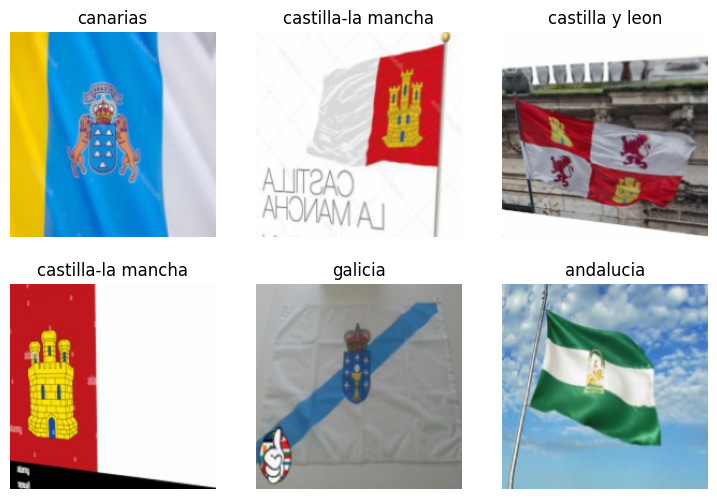

In [14]:
#path for the dataset 
path = Path("/home/obraisan/datasets/banderas")  # Update this path to your dataset location


# Create a DataBlock pipeline to organize image data for training:
dls = DataBlock(
    # Specify input (Image) and output (Category/Label) types:
    blocks=(ImageBlock, CategoryBlock),  # Images as inputs, Categories (labels) as outputs
    
    # Get image file paths from the directory 'path':
    get_items=get_image_files,  #get_items=get_image_files does expect a path—but you don’t give it directly in the DataBlock. Instead, you provide the path later when calling .dataloaders(path).
    
    # Split data into training (80%) and validation (20%) sets with a fixed random seed:
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Ensures reproducible splits
    
    # Extract labels from parent folder names (e.g., 'cat' for path 'data/cat/image.jpg'):
    get_y=parent_label,  # Assumes folder structure: `path/class_name/image.jpg`
    
    # Apply resizing to all images (squish to 192x192, preserving aspect ratio):
    item_tfms=Resize(192, method='squish'),  # Preprocessing on individual images

    #Apply augmentation to the datablock
    batch_tfms=aug_transforms(max_rotate=0,max_lighting=0.2) #Keep rotation as 0 as I manually rotated some of the images
).dataloaders(
    path,         # Path to the root directory containing labeled images
    bs=32         # Batch size of 32 for loading data
)

# Display a batch of 6 sample images with labels:
dls.show_batch(max_n=6)  # Visual sanity check (images + labels)


print(f"Datablock successfully created: {datetime.now().time().replace(microsecond=0)}")

In [16]:
# Verify the dataset path and contents:

print(f"Dataset path: {path}")  # Print the dataset path    
path.ls()  # List files and directories in the dataset path



Dataset path: /home/obraisan/datasets/banderas


(#19) [Path('/home/obraisan/datasets/banderas/cantabria'),Path('/home/obraisan/datasets/banderas/murcia'),Path('/home/obraisan/datasets/banderas/asturias'),Path('/home/obraisan/datasets/banderas/castilla y leon'),Path('/home/obraisan/datasets/banderas/pais vasco'),Path('/home/obraisan/datasets/banderas/canarias'),Path('/home/obraisan/datasets/banderas/navarra'),Path('/home/obraisan/datasets/banderas/islas baleares'),Path('/home/obraisan/datasets/banderas/aragon'),Path('/home/obraisan/datasets/banderas/madrid'),Path('/home/obraisan/datasets/banderas/andalucia'),Path('/home/obraisan/datasets/banderas/castilla-la mancha'),Path('/home/obraisan/datasets/banderas/melilla'),Path('/home/obraisan/datasets/banderas/ceuta'),Path('/home/obraisan/datasets/banderas/comunidad valenciana'),Path('/home/obraisan/datasets/banderas/catalunya'),Path('/home/obraisan/datasets/banderas/extremadura'),Path('/home/obraisan/datasets/banderas/la rioja'),Path('/home/obraisan/datasets/banderas/galicia')]

## Initializing Vision Learner and Fine-tuning ResNet18

This code cell creates a transfer learning model and begins the training process.

### Model Configuration:

* Initializes a vision learner using the prepared data loaders (dls)

* Utilizes ResNet18 architecture pre-trained on ImageNet

* Tracks both error rate and accuracy as training metrics

### Training Execution:

* Performs fine-tuning for 5 epochs using the fine_tune method

## The fine-tuning process:

* Gradually adapts pre-trained weights to the specific dataset

* Uses discriminative learning rates (faster for later layers, slower for earlier layers)

* Automatically handles head replacement and weight freezing/unfreezing



In [18]:
# Create and fine-tune ResNet18 model with the dls Datablock object created

learn = vision_learner( # Creates a transfer learning model for computer vision tasks.
    dls,                # DataLoaders object (contains training/validation data)
    resnet18,           # Architecture: ResNet18 (pretrained on ImageNet)
    metrics=[error_rate, accuracy]  # Track error rate (1 - accuracy) during training
)


learn.fine_tune(5)      # Fine-tune the pretrained model for 4 epochs:

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.354041,0.821560,0.216931,0.783069,00:05


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.869142,0.436995,0.116402,0.883598,00:06
1,0.585108,0.206023,0.047619,0.952381,00:06
2,0.373398,0.138664,0.042328,0.957672,00:05
3,0.252071,0.111410,0.026455,0.973545,00:06
4,0.178250,0.110581,0.026455,0.973545,00:06


## Model Performance Analysis and Error Investigation

This code cell performs comprehensive analysis of the trained model's performance on the validation set.

### Analysis Components:

* Confusion Matrix Visualization

* Displays the 10 validation examples with the highest loss values


This data provides insights into challenging cases and potential data issues



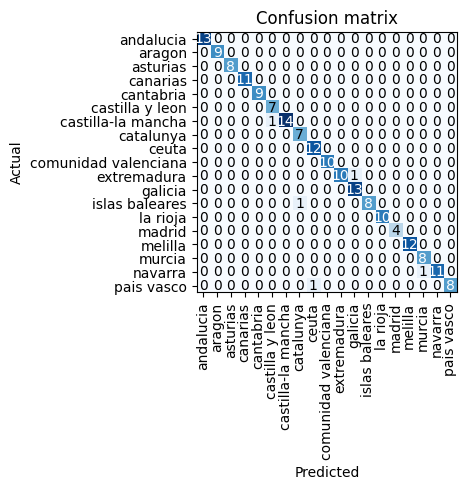

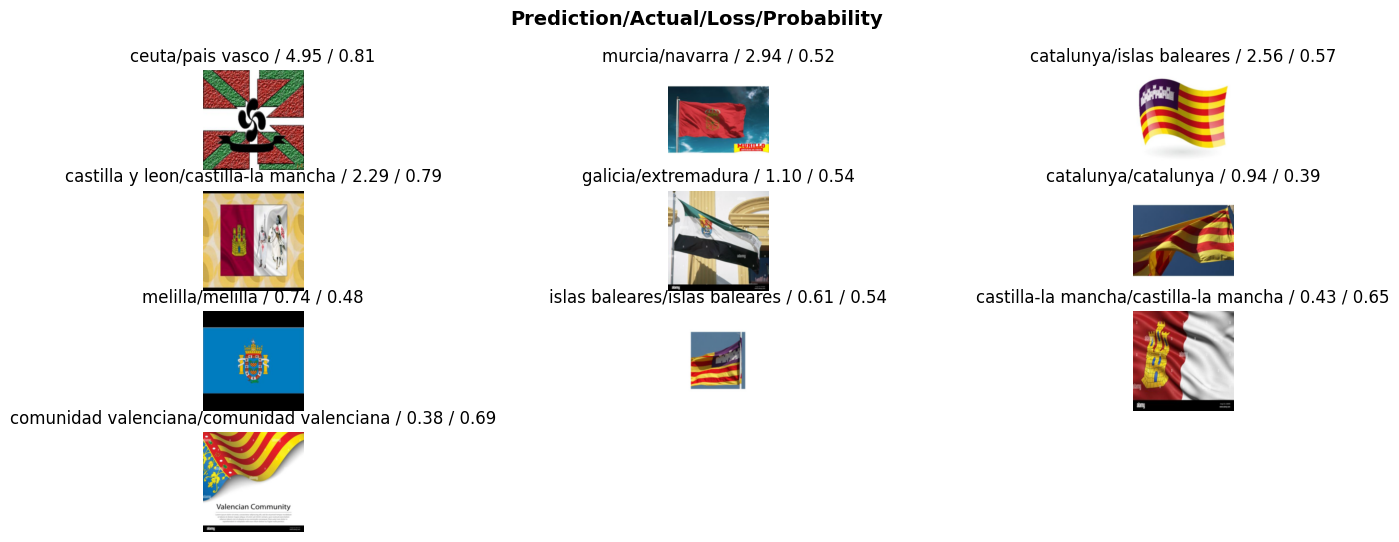

In [19]:
# Analyze model performance: confusion matrix and top losses


# Create interpretation object to analyze validation results
interp = ClassificationInterpretation.from_learner(learn)

# Plot confusion matrix: actual vs predicted classes
interp.plot_confusion_matrix()

# Show 10 most incorrect predictions (highest loss)
interp.plot_top_losses(10, nrows=4, figsize=(17,6))

## Conclusion

The ResNet18 model successfully learned to classify the regional flags with near-perfect accuracy. The training process shows:

* Effective transfer learning from ImageNet weights

* Rapid convergence within just 5 epochs of fine-tuning

* Highly reliable predictions suitable for production use

The model is ready for deployment with confidence in its classification capabilities.




## Exporting the succesfully trained model:

In [21]:
#Create a learner model file for exporting:

learn.export("ccaa_flag_model.pkl") #This will create the model as a notebook's output